In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [342]:
df = pd.read_csv('CarPrice.csv')
df.drop(columns=['car_ID','CarName'],inplace=True)
temp = df.copy()
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [344]:
con_col,cate_col = [],[]              #แยก column ที่เป็น เลข กับ category
for i in df.columns:
    if np.issubdtype(df[i],np.number):
        con_col.append(i)
    else:
        cate_col.append(i)
len(con_col)+len(cate_col)

24

In [345]:
std_scale = preprocessing.StandardScaler()
cor_df = std_scale.fit_transform(df[con_col])
cor_df = pd.DataFrame(cor_df,columns=con_col)
cor_df = cor_df.corr()
lower = pd.DataFrame(np.tril(cor_df,-1),columns = cor_df.columns)
to_drop = [column for column in lower.columns if any(lower[column] > 0.86)]
to_drop

['wheelbase', 'carlength', 'carwidth', 'enginesize', 'citympg']

In [346]:
temp.drop(columns=to_drop,inplace=True)
temp.drop(columns=cate_col,inplace=True)
temp

,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,3,48.8,2548,3.47,2.68,9.0,111,5000,27,13495.0
1,3,48.8,2548,3.47,2.68,9.0,111,5000,27,16500.0
2,1,52.4,2823,2.68,3.47,9.0,154,5000,26,16500.0
3,2,54.3,2337,3.19,3.40,10.0,102,5500,30,13950.0
4,2,54.3,2824,3.19,3.40,8.0,115,5500,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,3.78,3.15,9.5,114,5400,28,16845.0
201,-1,55.5,3049,3.78,3.15,8.7,160,5300,25,19045.0
202,-1,55.5,3012,3.58,2.87,8.8,134,5500,23,21485.0
203,-1,55.5,3217,3.01,3.40,23.0,106,4800,27,22470.0


In [347]:
df_encode = pd.get_dummies(data=df[cate_col],columns= cate_col,drop_first=True)
# for i in df_cata:
#     print(i)
df_encode

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [348]:
df_afterEncode = pd.concat([temp,df_encode], axis=1, join='inner') 
column_afterEncode_temp = df_afterEncode.columns
df_afterEncode.drop('price',inplace=True,axis=1)
df_afterEncode 

,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,fueltype_gas,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,48.8,2548,3.47,2.68,9.0,111,5000,27,1,...,0,0,0,0,0,0,0,1,0,0
1,3,48.8,2548,3.47,2.68,9.0,111,5000,27,1,...,0,0,0,0,0,0,0,1,0,0
2,1,52.4,2823,2.68,3.47,9.0,154,5000,26,1,...,0,0,0,0,0,0,0,1,0,0
3,2,54.3,2337,3.19,3.40,10.0,102,5500,30,1,...,0,0,0,0,0,0,0,1,0,0
4,2,54.3,2824,3.19,3.40,8.0,115,5500,22,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,3.78,3.15,9.5,114,5400,28,1,...,0,0,0,0,0,0,0,1,0,0
201,-1,55.5,3049,3.78,3.15,8.7,160,5300,25,1,...,0,0,0,0,0,0,0,1,0,0
202,-1,55.5,3012,3.58,2.87,8.8,134,5500,23,1,...,0,0,0,0,0,0,0,1,0,0
203,-1,55.5,3217,3.01,3.40,23.0,106,4800,27,0,...,0,0,0,0,0,1,0,0,0,0


In [349]:
X_standard = std_scale.fit_transform(df_afterEncode)
X_standard

array([[ 1.74347043, -2.0204173 , -0.01456628, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 1.74347043, -2.0204173 , -0.01456628, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 0.133509  , -0.54352748,  0.51488192, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       ...,
       [-1.47645244,  0.72823876,  0.87875722, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.47645244,  0.72823876,  1.27343679, ..., -0.92024282,
        -0.21428571, -0.070014  ],
       [-1.47645244,  0.72823876,  0.97502053, ...,  1.08666971,
        -0.21428571, -0.070014  ]])

Text(0, 0.5, 'Explained variance ratio')

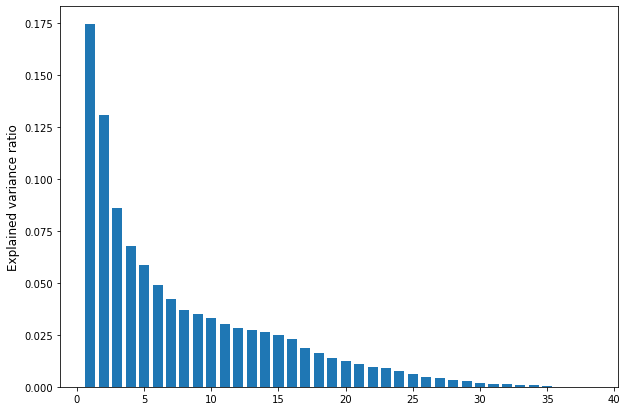

In [350]:
pca = PCA()
X_pca = pca.fit_transform(X_standard)
fig = plt.figure(figsize =(10, 7))
plt.bar([i for i in range(1,len(pca.explained_variance_ratio_)+1)],pca.explained_variance_ratio_,0.75)  #eigen value มี 38 ตัว เพราะมี 38 feature
plt.ylabel("Explained variance ratio",fontsize = 12) 


In [351]:
pca2 = PCA(n_components=5)
X_pca_2 = pca2.fit_transform(X_standard)

In [352]:
#shuffle spilt
Rseed = 55
x_train_set , x_test, y_train_set , y_test = train_test_split(df_afterEncode,df['price'],test_size= 0.3,random_state= Rseed)
x_train,x_validate,y_train,y_validate = train_test_split(x_train_set,y_train_set,test_size=0.3 ,random_state= Rseed)


In [353]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test)

In [354]:
print(r2_score(y_pred_lr,y_validate))    
print(r2_score(y_test_pred_lr,y_test))  
print(mean_squared_error(y_pred_lr,y_validate))   
print(mean_squared_error(y_test_pred_lr,y_test))

0.8206909414104174
0.8193366522739849
15746800.660516653
11005685.941442506


In [355]:
r2_valid_score = []
r2_test_score = []
mse_valid_score = []
mse_test_score = []
score_labelx = []
for i in range (4,39,15):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_standard)
    x_train_set , x_test, y_train_set , y_test = train_test_split(X_pca,df['price'],test_size= 0.3,random_state= Rseed) 
    x_train,x_validate,y_train,y_validate = train_test_split(x_train_set,y_train_set,test_size=0.3,random_state= Rseed)     
    lr.fit(x_train, y_train)
    y_pred_lr = lr.predict(x_validate)      # valid y_pred_lr       y_validate
    y_test_pred_lr = lr.predict(x_test)     # test  y_test_pred_lr  y_test
    print(f'r2_pred  = {r2_score(y_pred_lr,y_validate)}')    
    print(f'r2_test  = {r2_score(y_test_pred_lr,y_test)}')  # y_test_pred_lr ค่าที่ได้จาก model  , y_test ค่าที่แยกไว้ test
    print(f'mse_pred = {mean_squared_error(y_pred_lr,y_validate)}')   
    print(f'mse_test = {mean_squared_error(y_test_pred_lr,y_test)}')
    print(f'n_component = {i}')
    print('--------------------------------------')

    r2_valid_score.append(r2_score(y_pred_lr,y_validate))
    r2_test_score.append(r2_score(y_test_pred_lr,y_test))
    mse_valid_score.append(mean_squared_error(y_pred_lr,y_validate))
    mse_test_score.append(mean_squared_error(y_test_pred_lr,y_test))
    score_labelx.append(f'PCA_{i}')



r2_pred  = 0.36371277689644455
r2_test  = 0.45994477976161807
mse_pred = 26112460.950079884
mse_test = 16720123.097498294
n_component = 4
--------------------------------------
r2_pred  = 0.3401151987407991
r2_test  = 0.4435802260646732
mse_pred = 195679791.91035023
mse_test = 66770504.5524993
n_component = 19
--------------------------------------
r2_pred  = -0.019083448504431777
r2_test  = -0.013893568555310765
mse_pred = 5.1133647338991566e+32
mse_test = 1.4969803946533895e+32
n_component = 34
--------------------------------------


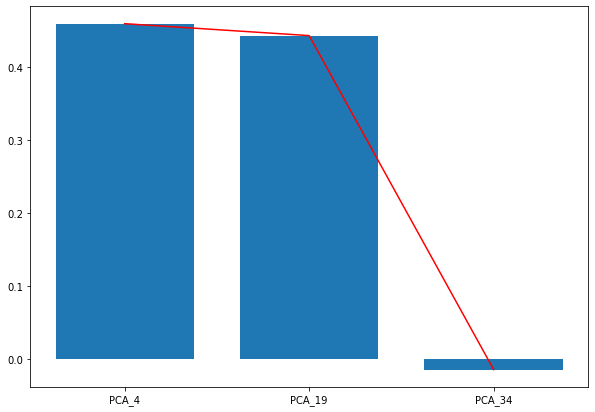

In [356]:
fig = plt.figure(figsize =(10, 7))
plt.bar(score_labelx,r2_test_score,0.75)
plt.plot(r2_test_score,color='r')

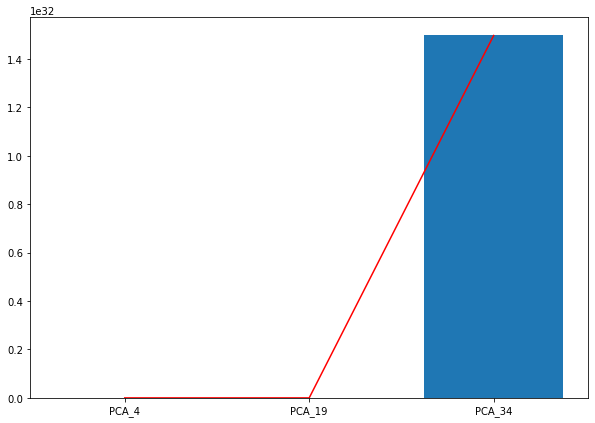

In [357]:
fig = plt.figure(figsize =(10, 7))
plt.bar(score_labelx,mse_test_score,0.75)
plt.plot(mse_test_score,color='r')